# Effect of process parameters on the evolution of pelleting pressure during oil palm shell pellets production

Using an open die with a several channels, we investigate in this work how the pelleting pressure of oil palm shell (OPS) pellets is affected by particle size, sample temperature, and moisture content. We discovered that the grain size had the greatest impact on the pelleting pressure. This work aims to further close the gap between industrial pelleting mills and single pellet laboratory scale setups.

## 2 Materials and methods

### 2.1 Raw materials 

Oil palm kernel shells (OPS) from the Elaeis guineensis Tenera variety were sourced from a local plantation in the eastern plains of Colombia. OPS were processed using a hammer mill with a 4 mm mesh. The output of the milling process was subsequently sieved utilizing standard sieve sizes ASTM E11-95 number 100 (0.15 mm). 80 (0.17 mm), 60 (0.25 mm), 35 (0.50 mm), 25 (0.71 mm), 18 (1.00 mm). Samples with grain sizes ranging from 0.15 mm to 0.17 mm and from 0.25 mm to 0.50 mm were chosen for experimentation. The moisture content of the samples was determined in accordance with the EN ISO 18134-3 standard. The sample with grain sizes ranging from 0.15 mm to 0.18 mm exhibits a moisture content of M_(PKS,ad) = 8.04 ± 0.07 %, while the sample with grain sizes between 0.25 mm and 0.50 mm shows a moisture content of M_(PKS,ad) = 8.69 ± 0.02 %. 

### 2.2 Biomass sample preparation before pelleting

The sample's initial moisture content and temperature must be modified prior to pelleting in accordance with the predetermined values outlined in the experimental plan (Section 2.4). To attain the necessary moisture content, the sample is positioned in a container, into which a predetermined quantity of water is introduced using a scale with a resolution of 0.001 g. In an industrial pelleting mill, biomass is heated through friction between the particles and the machine's die. In this configuration, the residence time is insufficient to heat the sample via friction; therefore, to replicate this effect, the samples were preheated in a 1000 W microwave oven before being placed in the laboratory pelleting mill. A portion of water evaporates during this process, impacting the moisture content of the samples. Due to the impracticality of measuring this amount of water during each run, as the sample would lose heat, a mathematical model must be developed to predict the final humidity and temperature of the sample introduced into the pelleting machine. 

An experimental plan was executed, establishing a correlation between microwave heating duration (t), the quantity of added water in the preceding step ($m_{H_2 O}$), and the amount of evaporated water during heating (m_(H_2 O,l)).   


### 2.2.1 Experimental design to predict the water lost during heating

A factorial experiment with 3 levels of residence time in the microwave oven (t = 10, 35, 70 s), 3 levels of added water (w = 0, 5, 11 g) and 3 replicas was performed. The initial mass was always 50 g of milled OPS with a grain size ranging from 0.5-0.25 mm. The response variables include the water loss (wl) in grams and the final sample temperature (Tf) in Celsius.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

oven = pd.read_csv('oven.csv') # Load the database with the experimental conditions

oven

,w,t,wl,Tf
0,0,10,0.024,35.9
1,0,10,0.021,36.0
2,0,35,0.263,80.3
3,0,35,0.267,86.0
4,0,60,0.755,98.1
5,0,60,0.732,94.4
6,5,10,0.072,43.4
7,5,10,0.073,48.5
8,5,35,0.782,94.1
9,5,35,0.783,93.2


#### 2.2.2 Correlation between residence time and added water on the final humidity of the sample

After collecting the data, we performed an ANOVA on the database to identify the parameters with the highest influence on water loss and final sample temperature. We used this information to create a mathematical model that predicts the parameters with statistical significance. 


In [2]:
# model consisting of w: added water in grams, t: residence time in s, and the interaction of both on the wl: water lost in the experiment in g)
model = ols('wl ~ w + t + t:w',data = oven).fit() 

# Run an anova type 3 since its better for parameters with interaction 
anova_result = sm.stats.anova_lm(model, typ=3) 

print (anova_result)

             sum_sq    df          F    PR(>F)
Intercept  0.073900   1.0   0.732098  0.406610
w          0.400076   1.0   3.963378  0.066388
t          0.959462   1.0   9.504966  0.008101
t:w        4.076577   1.0  40.384839  0.000018
Residual   1.413205  14.0        NaN       NaN


In [3]:
# model consisting of w: added water in grams, t: residence time in s, and the interaction of both on the wl: water lost in the experiment in g)
model = ols('wl ~ w + t + t:w',data = oven).fit() 

# Run an anova type 3 since its better for parameters with interaction 
anova_result = sm.stats.anova_lm(model, typ=1) 

print (anova_result)

            df     sum_sq    mean_sq           F        PR(>F)
w          1.0   4.868410   4.868410   48.229182  6.820524e-06
t          1.0  15.320540  15.320540  151.773804  6.669582e-09
t:w        1.0   4.076577   4.076577   40.384839  1.783640e-05
Residual  14.0   1.413205   0.100943         NaN           NaN


The heating time has a significant effect on the water lost, and as we can see, there is considerable interaction between the amount of water added and the residence time. The amount of water by itself does not seem to have a significant effect on the water lost, assuming a level of significance of 0.05. This implies that our prediction model should incorporate this parameter.

#### 2.2.3 Prediction model to determine the residence time and added water to achive the required final humidity

The model will be based on the machine learning library [Scik-learn](https://scikit-learn.org/stable/index.html) which is based on [Scipy](https://www.geeksforgeeks.org/python-scipy-curve_fit-with-multiple-independent-variables/).

In [4]:
from sklearn import linear_model
from sklearn.metrics import r2_score


X = oven[['w', 't']]    # Independent variables T (°C), P (kPa)
y = oven['wl']          # Dependent variable

wl_model = linear_model.LinearRegression()  # Linear regression model object
wl_model.fit(X, y)                          # Make a model using machine learning in order to predict the water lost

wl_sample = wl_model.predict(oven[['w', 't']])

r2_machine = r2_score(oven['wl'], wl_sample) # Calculate r2 to check the correlation

print('r2 = ', r2_machine)
print(wl_sample)


r2 =  0.7862128852443424
[-0.71310165 -0.71310165  0.41681502  0.41681502  1.54673168  1.54673168
 -0.13485531 -0.13485531  0.99506136  0.99506136  2.12497802  2.12497802
  0.55904029  0.55904029  1.68895696  1.68895696  2.81887363  2.81887363]


The coefficient of determination (r2) is too low to consider a good fit. We will try a different method. 

In [5]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     wl   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     80.13
Date:                Fri, 27 Dec 2024   Prob (F-statistic):           4.69e-09
Time:                        21:33:24   Log-Likelihood:                -2.6403
No. Observations:                  18   AIC:                             13.28
Df Residuals:                      14   BIC:                             16.84
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1973      0.231     -0.856      0.4

c:\Users\gone6\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



We used the following model after testing several parameter combinations and assessing the coefficient of determination. Note that the resulting coefficient is very close to 1, indicating potential overfitting of the model. However, this is not a concern in this particular scenario, as the parameter levels closely align with those used in the actual experiments. 

In [6]:
# define function with the model

def LinRegModel(A, t):
    Al = -6.529E-04*t*A+2.076E-04*t**2+1.303E-04*t**2*A+-4.139E-06*t**2*A**2
    
    return Al

In [7]:
# Run model with the input data
wl_lin_model = [LinRegModel(oven['w'][i], oven['t'][i]) for i in range(oven.shape[0])]

# Calculate r2
r2_lin = r2_score(oven['wl'], wl_lin_model)

print(wl_lin_model)
print('r2 = ', r2_lin)

[0.02076, 0.02076, 0.25431, 0.25431, 0.74736, 0.74736, 0.0429175, 0.0429175, 0.811383125, 0.811383125, 2.52438, 2.52438, 0.04218910000000002, 0.04218910000000002, 1.1452327249999998, 1.1452327249999998, 3.6733776000000002, 3.6733776000000002]
r2 =  0.9996236624580807


This fit is much better than the machine learning one. So we will use this fit.

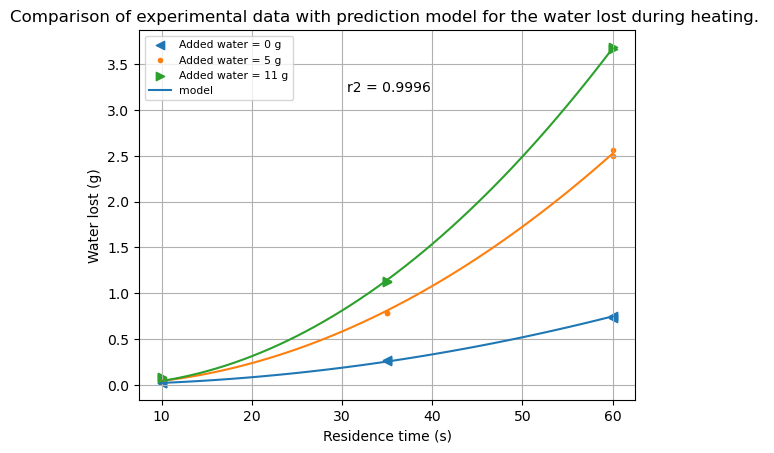

In [10]:

plt.figure()
plt.scatter(oven['t'][oven['w'] == 0], oven['wl'][oven['w'] == 0],marker = '<',  label='Added water = 0 g')
plt.scatter(oven['t'][oven['w'] == 5], oven['wl'][oven['w'] == 5],marker = '.', label='Added water = 5 g')
plt.scatter(oven['t'][oven['w'] == 11], oven['wl'][oven['w'] == 11],marker = '>', label='Added water = 11 g')
plt.plot( [x for x in range(10, 61)], [LinRegModel(0, i) for i in range(10,61)], label = 'model')
plt.plot( [x for x in range(10, 61)], [LinRegModel(5, i) for i in range(10,61)])
plt.plot( [x for x in range(10, 61)], [LinRegModel(11, i) for i in range(10,61)])
plt.xlabel("Residence time (s)")
plt.ylabel("Water lost (g)")
plt.grid()
plt.legend(fontsize = 7.8)
plt.text(30.5, 3.2, 'r2 = {0:.4f}'.format(r2_lin), )
plt.title('Comparison of experimental data with prediction model for the water lost during heating. ')
plt.show()

### 2.3	Pelleting mill and experimental procedure

We produced the pellets using a ram and die laboratory pelleting mill. Figure 1 displays the cross section of the ram and die assembly, along with a detailed depiction of the die's shape and dimensions. The die has 14 cylindrical holes with a diameter of 6 mm each. A hydraulic piston, capable of exerting a maximum force of 186 kN and moving at a constant speed of 600 mm/min, actuates the ram. During pelletizing, a data acquisition system continuously measures and acquires the position of the ram and the pressure of the hydraulic system every 0.025 seconds. We use a VEGABAR 17 sensor to measure the pressure. A linear transducer PL250 T6 measures the ram's position with a resolution of 1 mm.

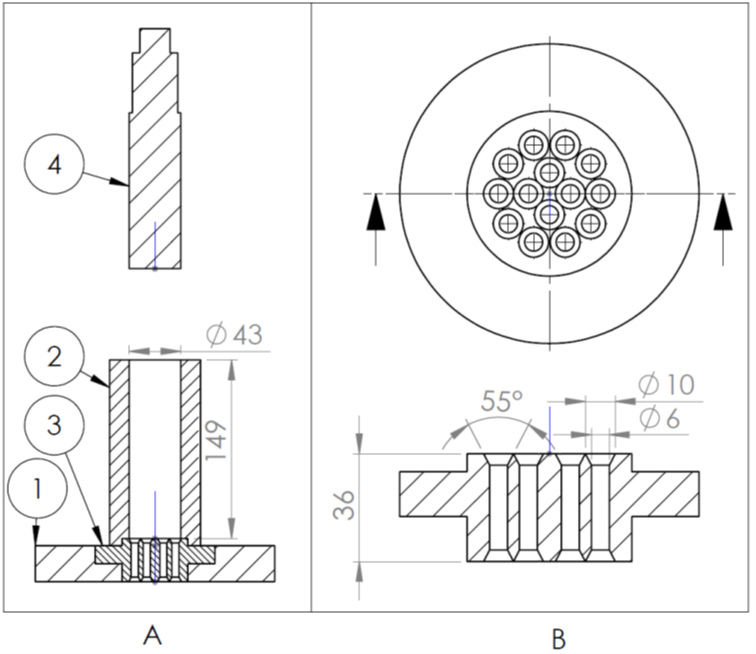


Figure 1. A Section view of the ram and die assembly: 1) Base, 2) Chamber, 3) Die, 4) Ram. B. Detail of the die 


The experiment commences with the pelleting unit's chamber being preheated to 100°C. We prepare the sample as outlined in section 2.2, load it onto the container, and actuate the ram. We record the position of the ram and the pressure on the biomass throughout the entire run. The pelletizing process finishes when the piston has run its full stroke or when the system jams and the hydraulic system reaches its maximum pressure.  

### 2.4	Experimental plan

Firstly, we determine the range of particle sizes and water content of the samples suitable for the experimental set-up. The primary issues encountered were either a lack of pressure causing the ram to jam or a lack of sufficient agglomeration in the extruded biomass. Particle sizes greater than 0.5 mm needed too much pressure to flow into the channels. Moreover, OPS without added water did not flow properly and lacked agglomeration. With the original moisture content of the samples and without heating, it was only possible to produce pellets with the smaller grain size of 0.15-0.17 mm. On the opposite side, pellets made with a humidity higher than 20 % did not behave as a cohesive mass but rather as a slurry without proper agglomeration. 

A factorial experiment with two levels of grain size (G: 0.15-0.17 mm and 0.17-0.25 mm), two levels of residence time in the microwave oven (t = 5 s & 35 s) and four levels of moisture content (H: 11 %, 13 %, 15 %, 17 %).  Table 1 shows the conditions of each test and the nomenclature used.


### 2.5 Data processing

Every 25 milliseconds, the data acquisition system gathers the position and pressure exerted by the ram. Because the sampling time is less than the transducer's millimeter resolution, it records multiple pressure data for a given position. On the graphs shown in this article, the pressure exerted by the ram at each position corresponds to the mean value of the recorded data at that particular position; this also applies to the experiments with replicas. 

For the tests in which the ram jams, the last reported position corresponds to that in which the pressure increases but there is no movement. For the tests in which complete extrusion took place, the last reported position is 2 mm before the end of the stroke.




#### 2.5.1  Collection of the information

The individual conducting the experiment required an easy-to-use collection table. This was made in Excel.  However, preprocessing is necessary to analyze the data effectively.

#### 2.5.2 Experiment execution information


On the table headers, there is information regarding the conditions on which each experiment was executed; the information below has the position and pressure for each experiment.

Firstly, we will extract the experiment conditions and store them in a database. Next, we will store the experiment results, including the position and pressure during the experiment, in a separate database. We will correlate the information with the experiment ID.

In [11]:
from openpyxl import load_workbook

# Load excel workbook
wb = load_workbook("Log_Pres.xlsx")    
ws = wb['FAC-3']                            # load Working Sheet

# Collect experiment execution data
cells = ws[1]                                               # retrieve the first row
tags = [cells[x].value for x in range(2,len(cells), 2)]     # retrieve the first row values

cells = ws[2]                                               # retrieve the second row
grain = [cells[x].value for x in range(2,len(cells), 2)]    # retrieve the second row values

cells = ws[3]                                               # retrieve the third row
Ts = [cells[x].value for x in range(2,len(cells), 2)]       # retrieve the third row values

cells = ws[4]                                               # retrieve the fourth row
Hf = [cells[x].value for x in range(2,len(cells), 2)]       # retrieve the fourth row values

# Make the data a pandas database
exp_db = pd.DataFrame({'exp_id': tags, 'grain': grain, 'sample_temp': Ts, 'humidity': Hf}) 

# Save the cleaned information in a csv file for easy retrieval later
exp_db.to_csv('experiments_info.csv', index=False)

In [12]:
exp_db

,exp_id,grain,sample_temp,humidity
0,25H171,0.5-0.25,90,17
1,25H172,0.5-0.25,90,17
2,25H173,0.5-0.25,90,17
3,25H151,0.5-0.25,90,15
4,25H152,0.5-0.25,90,15
5,25H153,0.5-0.25,90,15
6,25H131,0.5-0.25,90,13
7,25H132,0.5-0.25,90,13
8,25H133,0.5-0.25,90,13
9,25H111,0.5-0.25,90,11


#### 2.5.3 Experiment results

After extracting the experiment execution conditions, we will extract the position and pressure results for each experiment from the Excel worksheet.

In [13]:
# Collect the experiment results for each expriment regarding position and pressure from the excel worksheet
data = []
for col in ws.iter_cols(min_row=6, max_row=502, min_col=3,  max_col=110, values_only=True): # iterate over the worksheet columns and extract the cell values
    temp = list(col)
    while temp.pop() == None: # Delete the empty spaces at the end of the columns
        pass
    data.append(temp)

In [14]:
# Start an empty pandas dataframe to store each experiments position and pressure
pos_press_df = pd.DataFrame(columns=['exp_id', 'pos', 'press'])

for i in range(len(tags)):
    temp = zip([tags[i] for x in range(len(data[i*2]))], data[i*2], data[i*2+1]) # make a small dataframe with the firtst column with the exp_id, second column the position and the third column the orresponding pressure
    pos_press_df = pd.concat([pd.DataFrame(temp, columns=pos_press_df.columns), pos_press_df]) # Add the experiment information to the pandas database

pos_press_df.to_csv('pos_press_df.csv', index=False) # Save the cleaned information to a csv file for easy retreaval later

C:\Users\gone6\AppData\Local\Temp\ipykernel_10664\3326393114.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pos_press_df = pd.concat([pd.DataFrame(temp, columns=pos_press_df.columns), pos_press_df]) # Add the experiment information to the pandas database


In [15]:
pos_press_df.head()

,exp_id,pos,press
0,17H17R3,81,3.43
1,17H17R3,81,2.66
2,17H17R3,81,3.43
3,17H17R3,82,3.43
4,17H17R3,82,3.43



The sampling time for the instruments is quicker than the ram velocity; this means that there are several repeated positions with different pressures. We will use only one position and report the pressure average for each individual position. 

In [16]:
# Make a pandas dataframe with the individual positions and the average pressure for each position
pos_pres_uni = pos_press_df.groupby(['exp_id', 'pos'], as_index=False).mean()

pos_pres_uni.to_csv('pos_press_df.csv', index=False) # Save the cleaned information to a csv file for easy retrieval later

In [17]:
pos_pres_uni.head()

,exp_id,pos,press
0,17H111,81,2.755000
1,17H111,82,2.786667
2,17H111,83,2.786667
3,17H111,84,2.755000
4,17H111,85,2.786667


## 3.	Results and discussion



### 3.1	Description of the biomass flow within the channel

We will do an exploratory analysis to see the general behavior of the pressure during extrusion. To do this, we will plot the behavior of three experiments, corresponding to high, low, and intermediate pelleting pressures.


In [18]:
print(exp_db)

print(exp_db['grain'].value_counts())
print(exp_db['sample_temp'].value_counts())
print(exp_db['humidity'].value_counts())


     exp_id      grain  sample_temp  humidity
0    25H171   0.5-0.25           90        17
1    25H172   0.5-0.25           90        17
2    25H173   0.5-0.25           90        17
3    25H151   0.5-0.25           90        15
4    25H152   0.5-0.25           90        15
5    25H153   0.5-0.25           90        15
6    25H131   0.5-0.25           90        13
7    25H132   0.5-0.25           90        13
8    25H133   0.5-0.25           90        13
9    25H111   0.5-0.25           90        11
10   25H112   0.5-0.25           90        11
11   25H113   0.5-0.25           90        11
12  25H17R1   0.5-0.25           90        17
13  25H17R2   0.5-0.25           90        17
14  25H17R3   0.5-0.25           90        17
15   25L171   0.5-0.25           30        17
16   25L172   0.5-0.25           30        17
17   25L173   0.5-0.25           30        17
18   25L151   0.5-0.25           30        15
19   25L152   0.5-0.25           30        15
20   25L153   0.5-0.25           3

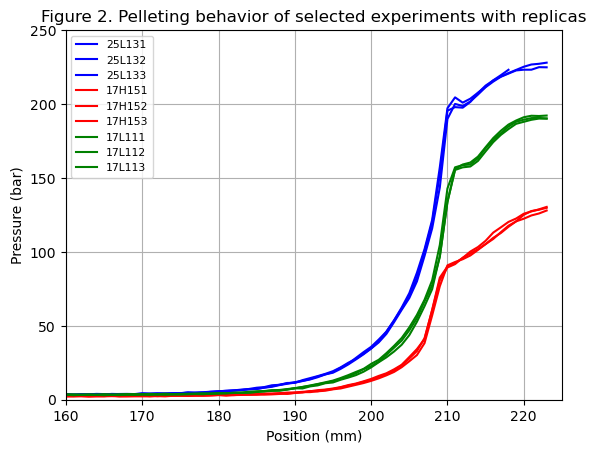

In [19]:
# exp_db columns and Experiment levels for reference : exp_id	grain: '0.5-0.25','0.17-0.15' 	sample_temp: 30, 90	humidity: 11, 13, 15, 17

plt.figure()

filtered_tags = exp_db[(exp_db['grain'] == '0.5-0.25') & (exp_db['sample_temp'] == 30) & (exp_db['humidity'] == 13)]['exp_id']
for i in filtered_tags:
    plt.plot(pos_pres_uni[pos_pres_uni['exp_id'] == i]['pos'], pos_pres_uni[pos_pres_uni['exp_id'] == i]['press'], label= i, color = 'b')
    
filtered_tags = exp_db[(exp_db['grain'] == '0.17-0.15') & (exp_db['sample_temp'] == 90) & (exp_db['humidity'] == 15)]['exp_id']
for i in filtered_tags:
    plt.plot(pos_pres_uni[pos_pres_uni['exp_id'] == i]['pos'], pos_pres_uni[pos_pres_uni['exp_id'] == i]['press'], label= i, color = 'r')
    
filtered_tags = exp_db[(exp_db['grain'] == '0.17-0.15') & (exp_db['sample_temp'] == 30) & (exp_db['humidity'] == 11)]['exp_id']
for i in filtered_tags:
    plt.plot(pos_pres_uni[pos_pres_uni['exp_id'] == i]['pos'], pos_pres_uni[pos_pres_uni['exp_id'] == i]['press'], label= i, color = 'g')
    
plt.xlabel("Position (mm)")
plt.ylabel("Pressure (bar)")
plt.grid()
plt.legend(fontsize = 7.8)
plt.axis([160, 225, 0, 250])
plt.title('Figure 2. Pelleting behavior of selected experiments with replicas')
#plt.text(32, 3.2, 'r2 = {0:.4f}'.format(r2_lin), )
plt.show()



After inspecting the behavior of several experimental conditions (Figure 2), there seem to be three distinct stages in the pelleting process: compression, flow, and stabilization. Regardless of the pelleting conditions.

Figure 3 illustrates the behavior of a single experiment and its replicas, with the axis zoomed in to provide a deeper understanding of the behavior. The compression stage starts with the pressure rapidly increasing until reaching a local maximum at 211 mm. During this stage, the ram primarily compresses the biomass, but not enough to force it into the die's channels. The biomass eventually undergoes sufficient compression and reaches high enough pressure to pass through the channels; we refer to this stage as flow. At this point, we notice a sudden decrease in pressure as the escaping biomass lowers the pressure within the chamber. As the biomass continues to extrude, the friction with the walls starts to build pressure; at higher pressures, the normal force that the biomass exerts on the wall increases, and so the friction increases as well. Higher pressure causes more biomass to flow in the channels, increasing friction and necessitating more pressure to maintain a steady state. During the stabilization stage, the chamber extrudes the remaining biomass at a stable pressure.

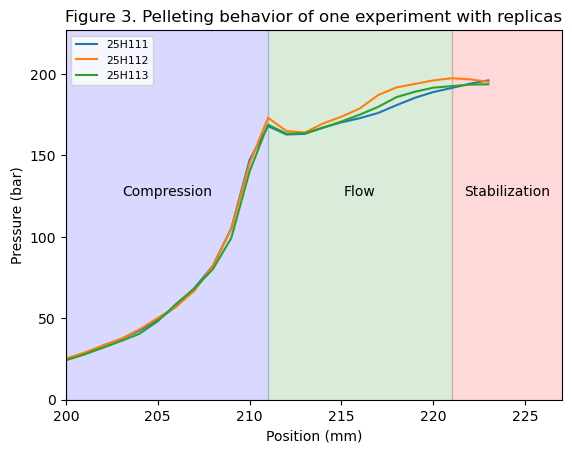

In [20]:
plt.figure()
filtered_tags = exp_db[(exp_db['grain'] == '0.5-0.25') & (exp_db['sample_temp'] == 90) & (exp_db['humidity'] == 11)]['exp_id'] # Filter the replicas for a particular experiment
for i in filtered_tags:
    plt.plot(pos_pres_uni[pos_pres_uni['exp_id'] == i]['pos'], pos_pres_uni[pos_pres_uni['exp_id'] == i]['press'], label= i)
plt.xlabel("Position (mm)")
plt.ylabel("Pressure (bar)")
#plt.grid()
plt.legend(fontsize = 7.8)
plt.axis([200, 227, 0, 227])
plt.axvspan(200, 211,  color='blue', alpha=0.15)
plt.axvspan(211, 221, color='green', alpha=0.15)
plt.axvspan(221, 227,  color='red', alpha=0.15)
plt.title('Figure 3. Pelleting behavior of one experiment with replicas')
plt.text((200+211)/2, 125, 'Compression', horizontalalignment='center', )
plt.text((221+211)/2, 125, 'Flow', horizontalalignment='center', )
plt.text((221+227)/2, 125, 'Stabilization', horizontalalignment='center', )
plt.show()


The presence of a stabilization pressure in the extrusion process is crucial for the quality of the pellets. If the extruded pellets fail to reach this pressure, they will not be homogenous. This is because properties like density and agglomeration, which are dependent on the compacting pressure, will exhibit a gradient throughout the pellet. This implies that in an industrial process, upon emptying the die and producing a new batch of pellets, one should discard the initial pellets and utilize only those that have achieved a stable pelleting pressure.

### 3.2 Correlation between pelleting parameters and stabilization pressure

In order to analyze the influence of the pelleting parameters on the stabilization pressure, we will first find an average pressure between replicas. And build a database with the parameters and the corresponding pelleting pressure. 

In [21]:
# Add the stabilization pressure to the experiments database
stab_press = []

for i in exp_db['exp_id']:
    stab_press.append(pos_pres_uni[pos_pres_uni['exp_id'] == i]['press'].max()) # Get the stabilization pressure for every experiment

exp_db['press'] = stab_press


# Make a pandas dataframe with the unique experimental combinations, report the mean stabilization pressure between replicas
exp_db_results = exp_db.drop(columns=['exp_id']).groupby(['grain', 'sample_temp', 'humidity'], as_index=False).mean()

exp_db_results.to_csv('exp_db_results.csv', index=False) # Save the cleaned information to a csv file for easy retrieval later

exp_db_results

,grain,sample_temp,humidity,press
0,0.17-0.15,30,11,190.991944
1,0.17-0.15,30,13,176.472667
2,0.17-0.15,30,15,163.515556
3,0.17-0.15,30,17,147.574500
4,0.17-0.15,90,11,159.347778
5,0.17-0.15,90,13,150.086667
6,0.17-0.15,90,15,129.396944
7,0.17-0.15,90,17,134.082143
8,0.5-0.25,30,11,224.850667
9,0.5-0.25,30,13,225.364722



To illustrate the impact of the pelleting conditions, we created the figure 4 below. This figure shows the impact of humidity, sample temperature, and grain size on the stabilization pressure among the replicas. An area in this figure represents the range between experiment replicas.

c:\Users\gone6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gone6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


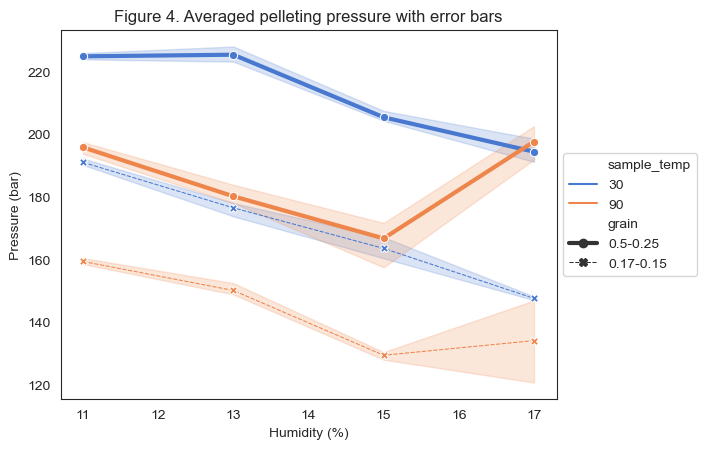

In [22]:
sns.set_style("white")
sns.lineplot(data=exp_db, x='humidity', y='press',hue='sample_temp', hue_order=[30, 90], palette='muted', style='grain', size='grain', markers=True)
plt.xlabel('Humidity (%)')
plt.ylabel('Pressure (bar)')
plt.title('Figure 4. Averaged pelleting pressure with error bars')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


Effect of sample temperature: With the longer heating times (for the same levels of the other parameters), the pressure needed to extrude the biomass decreases significantly. Increasing the temperature of the biomass's main polymers—cellulose, hemicellulose, and lignin—may reduce the force needed to deform it and make it flow easier into the channels.

Effect of moisture content: In general, as the water content increases on the sample, the stabilization pressure decreases. This may be caused by the water in the wall-particle and particle-particle interface acting as a lubricant. Additionally, studies have demonstrated that the humidity in the sample lowers the glass transition temperature (Tg) of the polymers that make up the biomass. Therefore, a combination of high temperature and high humidity exerts a more significant effect than either parameter alone, achieving the highest effect among all parameter combinations. To check for experimental error, we repeated the experiments with the longest heating time and the highest moisture content but consistently found the same results; the literature provides no explanation for this behavior.

Effect of particle size: The results found on this project show that as the particle size increases, so does the pressure needed to extrude the biomass. There are two components to consider when evaluating the energy needed to make the biomass flow: first, the biomass has to move from the larger chamber into the die channels, and then the flow needs to overcome the friction within the channel walls. The energy required to force the biomass into the channels increases as the grain size increases, while inside the channel, the contact area increases as the grain size decreases. This implies that the energy required to force the biomass into the channel exerts a greater influence on the pelleting pressure than the friction with the wall component.